# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
import pandas as pd
import os
file_path = '/content/drive/Data/airbnb_listings.csv'


if os.path.exists(file_path):
    print("파일이 존재합니다. 파일을 불러올 수 있습니다.")

    import pandas as pd
    df = pd.read_csv(file_path)
    print(df.head())
else:
    print("파일이 존재하지 않습니다. 경로를 확인해주세요.")

파일이 존재하지 않습니다. 경로를 확인해주세요.


In [82]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

<ipython-input-82-bfbc7cd960cb>:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [83]:
# Q1
pd.set_option('display.max_columns', None)
print(df.head())

     id  host_response_time host_response_rate host_acceptance_rate  \
0  2060  a few days or more                22%                  50%   
1  2595        within a day                87%                  38%   
2  3831      within an hour                83%                  96%   
3  5099                 NaN                NaN                  71%   
4  5114        within a day                50%                  NaN   

  host_is_superhost  host_listings_count  host_total_listings_count  \
0                 f                  0.0                        0.0   
1                 f                  6.0                        6.0   
2                 f                  1.0                        1.0   
3                 f                  1.0                        1.0   
4                 f                  3.0                        3.0   

                                  host_verifications host_has_profile_pic  \
0                                        ['reviews']                 

---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [84]:
# Q2

missing_value = df.isnull().sum()

missing_value = missing_value[missing_value > 0]

missing_value = missing_value.sort_values(ascending=False)

print(missing_value)

jurisdiction_names             50781
license                        50759
square_feet                    50407
monthly_price                  46119
weekly_price                   45411
host_response_rate             19006
host_response_time             19006
security_deposit               17325
host_acceptance_rate           14015
review_scores_value            11482
review_scores_location         11482
review_scores_checkin          11479
review_scores_accuracy         11466
review_scores_communication    11463
review_scores_cleanliness      11452
review_scores_rating           11431
reviews_per_month              10453
beds                             482
bedrooms                          77
bathrooms                         54
host_listings_count                5
host_total_listings_count          5
host_has_profile_pic               5
host_is_superhost                  5
host_identity_verified             5
dtype: int64


In [85]:
#Q2
missing_percentage = (missing_value / len(df)) * 100

missing_data = pd.concat([missing_value, missing_percentage], axis=1)
missing_data.columns = ['	missing_num', 'missing_%']

missing_data = missing_data.sort_values(by='	missing_num', ascending=False)

print(missing_data)


                             \tmissing_num  missing_%
jurisdiction_names                   50781  99.970470
license                              50759  99.927160
square_feet                          50407  99.234192
monthly_price                        46119  90.792582
weekly_price                         45411  89.398772
host_response_rate                   19006  37.416332
host_response_time                   19006  37.416332
security_deposit                     17325  34.107016
host_acceptance_rate                 14015  27.590755
review_scores_value                  11482  22.604142
review_scores_location               11482  22.604142
review_scores_checkin                11479  22.598236
review_scores_accuracy               11466  22.572644
review_scores_communication          11463  22.566738
review_scores_cleanliness            11452  22.545082
review_scores_rating                 11431  22.503740
reviews_per_month                    10453  20.578392
beds                        

- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52972 (\N{HANGUL SYLLABLE KEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47100 (\N{HANGUL SYLLABLE REOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

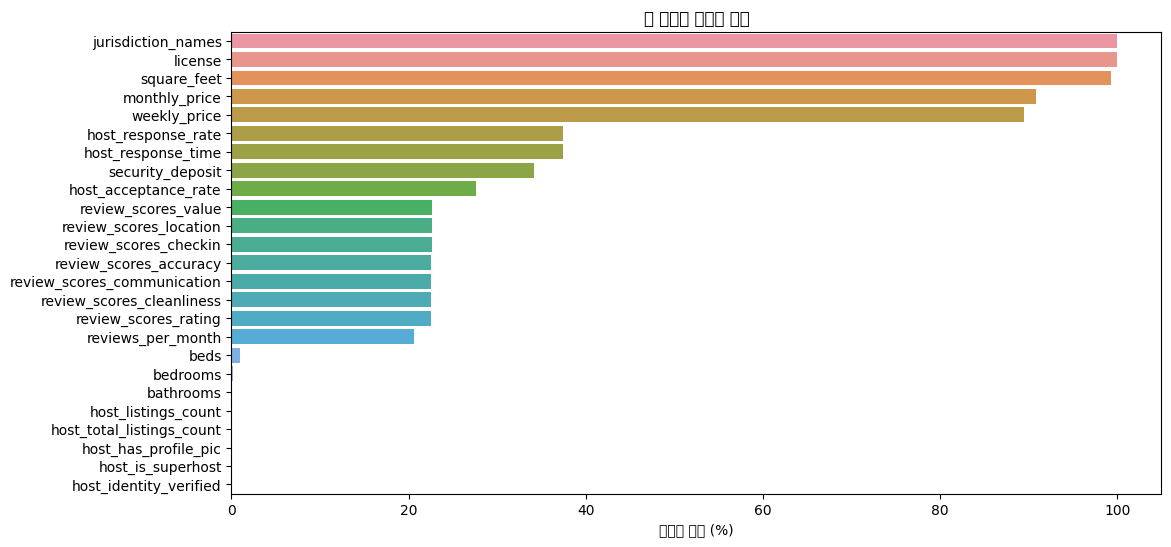

In [86]:
# Q3
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage.values, y=missing_percentage.index, orient='h')
plt.xlabel('결측치 비율 (%)')
plt.title('각 컬럼의 결측치 비율')
plt.show()


- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [87]:
# Q4
beds_missing_data = df[df['beds'].isnull()]

print(beds_missing_data.head())

          id host_response_time host_response_rate host_acceptance_rate  \
808   321845                NaN                NaN                  NaN   
1002  468613                NaN                NaN                  NaN   
1058  499249                NaN                NaN                   0%   
1074  505231                NaN                NaN                  NaN   
1208  587519                NaN                NaN                   0%   

     host_is_superhost  host_listings_count  host_total_listings_count  \
808                  f                  0.0                        0.0   
1002                 f                  1.0                        1.0   
1058                 f                  1.0                        1.0   
1074                 f                  1.0                        1.0   
1208                 f                  1.0                        1.0   

                                     host_verifications host_has_profile_pic  \
808                     

---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [88]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [89]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44079 (\N{HANGUL SYLLABLE GAES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


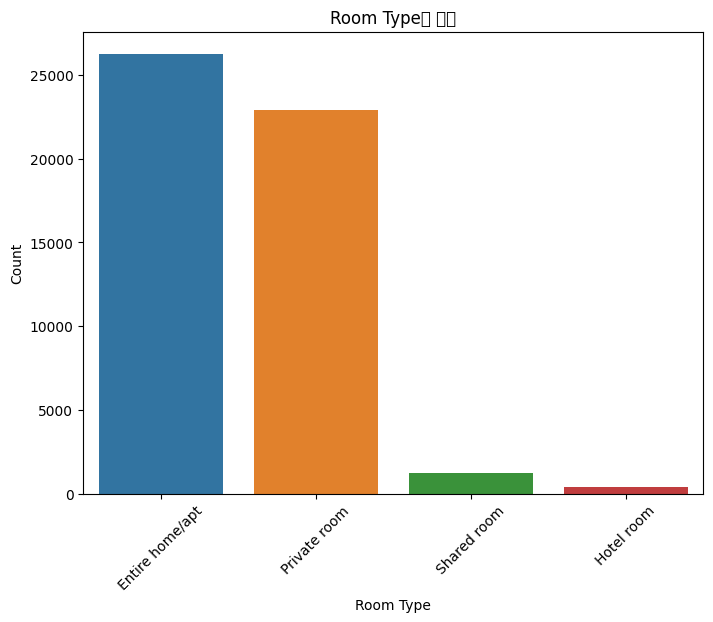

In [91]:
# Q5
room_type_counts = df['room_type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Room Type별 갯수')
plt.xticks(rotation=45)
plt.show()

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


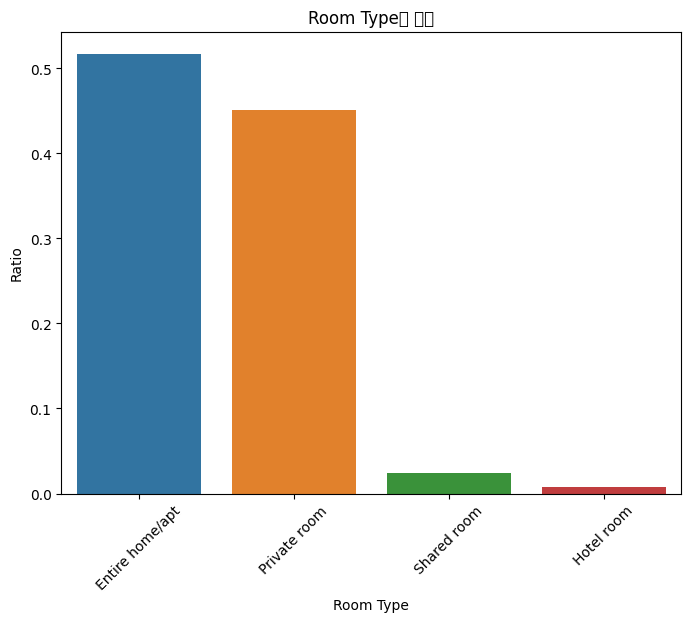

In [92]:
# Q6
room_type_ratio = df['room_type'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
sns.barplot(x=room_type_ratio.index, y=room_type_ratio.values)
plt.xlabel('Room Type')
plt.ylabel('Ratio')
plt.title('Room Type별 비율')
plt.xticks(rotation=45)
plt.show()

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44079 (\N{HANGUL SYLLABLE GAES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

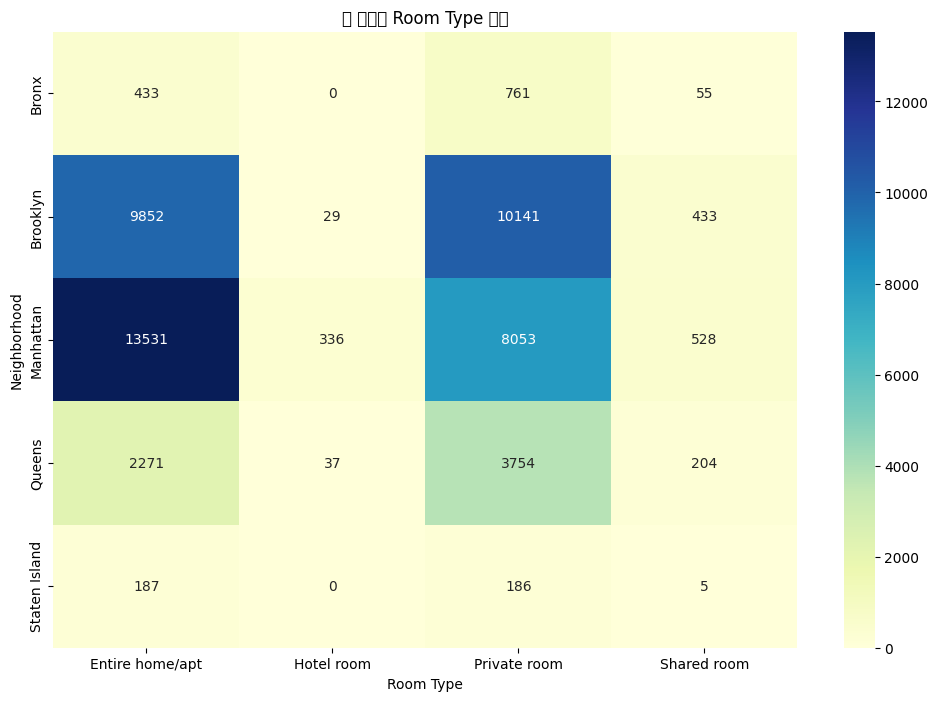

In [93]:
# Q7
room_type_counts_by_neighbourhood = df.groupby(['neighborhood', 'room_type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(room_type_counts_by_neighbourhood, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Room Type')
plt.ylabel('Neighborhood')
plt.title('각 지역별 Room Type 갯수')
plt.show()

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

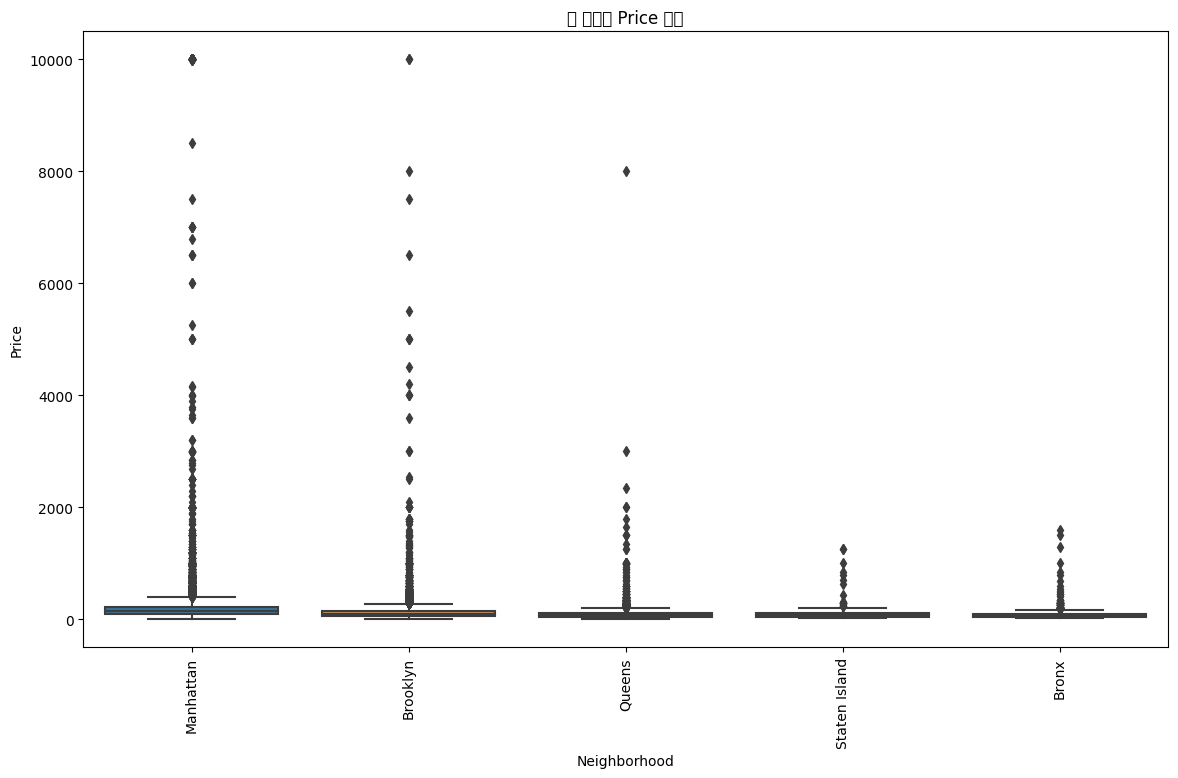

In [94]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='neighborhood', y='price')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('각 지역별 Price 분포')
plt.xticks(rotation=90)
plt.show()

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [95]:
# Q9
# 지역에 따른 가격 그래프를 보면 3시그마인 값을 넘는 이상치들이 많이 존재함을 알 수 있다.

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

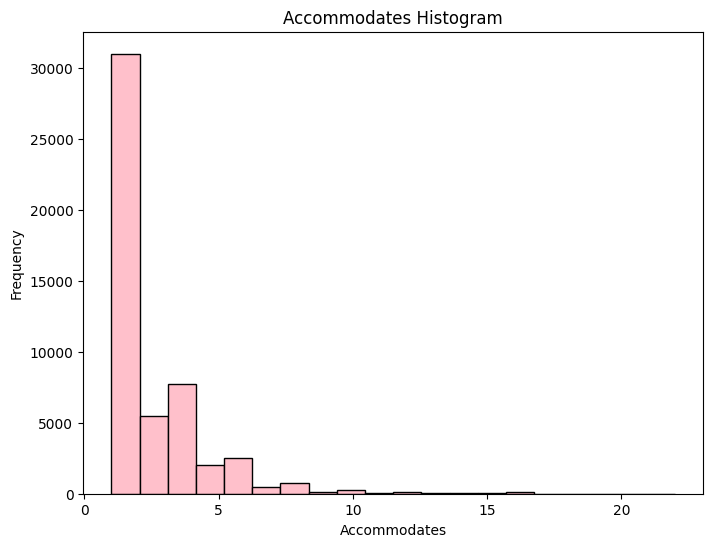

In [96]:
# Q10
plt.figure(figsize=(8, 6))
plt.hist(df['accommodates'], bins=20, color='pink', edgecolor='black')
plt.xlabel('Accommodates')
plt.ylabel('Frequency')
plt.title('Accommodates Histogram')
plt.show()

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

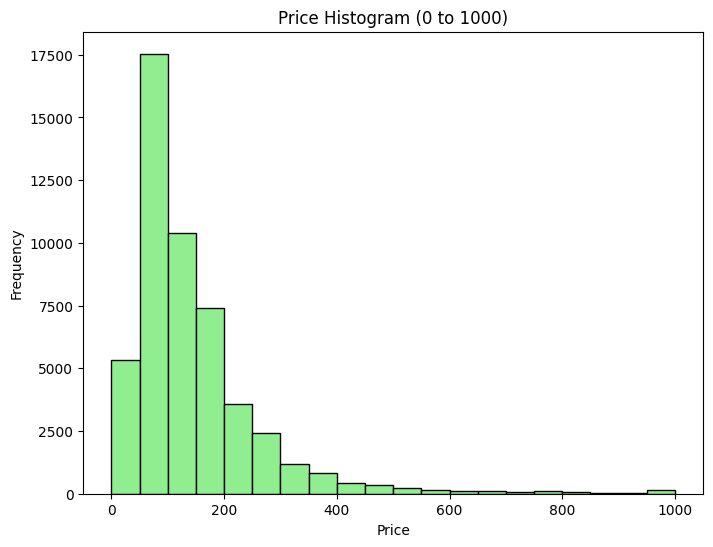

In [97]:
# Q11
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=20, range=(0, 1000), color='lightgreen', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Histogram (0 to 1000)')
plt.show()

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [98]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

<ipython-input-98-bfbc7cd960cb>:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [99]:
#Q12
missing_percentage = (df.isnull().sum() / len(df)) * 100

example_column = 'example_column'

if example_column in df.columns:
    df[example_column] = pd.to_numeric(df[example_column], errors='coerce')

    median_value = df[example_column].median()
    df[example_column].fillna(median_value, inplace=True)

print(df)

             id  host_response_time host_response_rate host_acceptance_rate  \
0          2060  a few days or more                22%                  50%   
1          2595        within a day                87%                  38%   
2          3831      within an hour                83%                  96%   
3          5099                 NaN                NaN                  71%   
4          5114        within a day                50%                  NaN   
...         ...                 ...                ...                  ...   
50791  42890680      within an hour               100%                 100%   
50792  42890730      within an hour               100%                  99%   
50793  42891018                 NaN                NaN                  NaN   
50794  42891637                 NaN                NaN                 100%   
50795  42892717  a few days or more                 0%                 100%   

      host_is_superhost  host_listings_count  host_

- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [100]:
#Q13-1)
def count_amenities(amenities_str):
    amenities_set = set(amenities_str.strip('{}').split(','))
    return len(amenities_set)

df['amenities_count'] = df['amenities'].apply(count_amenities)

print(df['amenities_count'])

# amenities_count열을 추가하여 편의시설의 개수를 나타내는 변수를 만듦으로써 범주형 데이터를 다룰 수 있도록 하였다.

0         2
1        33
2        38
3        32
4        10
         ..
50791    12
50792    11
50793     8
50794    21
50795     3
Name: amenities_count, Length: 50796, dtype: int64


In [101]:
#Q13-2)
def categorize_acceptance_rate(acceptance_rate):
    if pd.notna(acceptance_rate):
        acceptance_rate = float(acceptance_rate.strip('%'))
        if acceptance_rate > 80:
            return 'high'
        elif 50 <= acceptance_rate <= 80:
            return 'avg'
    return 'low'

# 'acceptance_category' 열을 추가합니다.
df['acceptance_category'] = df['host_acceptance_rate'].apply(lambda x: categorize_acceptance_rate(x))

# 새로운 'acceptance_category' 열을 출력합니다.
print(df['acceptance_category'])

# host_acceptance_rate의 상대적인 크기를 보기 위해 50%, 80%를 기준으로 하여 low, avg, high값을 갖는 acceptance_category변수를 추가하였다.

0         avg
1         low
2        high
3         avg
4         low
         ... 
50791    high
50792    high
50793     low
50794    high
50795    high
Name: acceptance_category, Length: 50796, dtype: object


In [102]:
#Q13-3)
def categorize_price(price):
    if pd.notna(price):
        price = str(price).replace('$', '').replace(',', '')  # 문자열로 형변환 후 처리
        price = float(price)
        if price <= 100:
            return 'cheap'
        elif price >= 200:
            return 'expensive'
    return 'avg'

# 'price_category' 열을 추가합니다.
df['price_category'] = df['price'].apply(lambda x: categorize_price(x))

# 새로운 'price_category' 열을 출력합니다.
print(df['price_category'])
# 2번과 비슷한 방법으로 price 변수의 상대적 크기를 알기위해 100, 200을 기준으로 cheap, avg, expensive를 나누어 새로운 변수인 price_category를 만들었다.

0            cheap
1        expensive
2            cheap
3        expensive
4            cheap
           ...    
50791          avg
50792          avg
50793          avg
50794    expensive
50795    expensive
Name: price_category, Length: 50796, dtype: object


---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가

</font>

* Q3 hint


<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
